### Data mining

In [1]:
import pandas as pd
import thinkplot
import thinkstats2
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

Read in data

In [2]:
df_raw = pd.read_csv('../Data/usa_00002.csv')
df_raw.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
0,2017,1,1,2017000000016,206,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,1,1,117,13820,5,1200,10,50,642,734
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,13,0,0,5,1700,10,45,1805,1849
3,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0
4,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
work_force = df_raw[df_raw.EMPSTAT == 1] # Consider all employed people

Remove NaNs

In [4]:
work_force = work_force.dropna()
work_force.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,DIFFHEAR,PWSTATE2,PWCOUNTY,PWMET13,PWTYPE,PWPUMA00,TRANWORK,TRANTIME,DEPARTS,ARRIVES
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,1,1,117,13820,5,1200,10,50,642,734
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,1,13,0,0,5,1700,10,45,1805,1849
5,2017,1,4,2017000000158,19,32,41,1,0,0,...,1,1,0,0,9,2500,10,25,717,744
10,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,60,602,704
11,2017,1,5,2017000000159,21,32,41,1,0,0,...,1,1,0,0,9,290,10,85,702,829


Recode `SEX` to be 0 for female and 1 for male.

In [5]:
work_force['SEX'].replace(2, 0, inplace=True)
work_force['SEX'].value_counts()

1    775971
0    713015
Name: SEX, dtype: int64

Find hourly income using `UHRSWORK`, Usual hours worked per week, and `WKSWORK2`, Weeks worked last year (intervalled).

In [6]:
work_force = work_force[work_force['UHRSWORK'] >= 30] # Usual hours worked per week
work_force = work_force[work_force['WKSWORK2'] >= 3] # Weeks worked last year (level)

In [7]:
work_force['UHRSWORK'].replace([0], np.nan, inplace=True)
work_force['WKSWORK'] = work_force['WKSWORK2'].replace([0, 1, 2, 3, 4, 5, 6], [np.nan, 7, 20, 33, 43.5, 48.5, 51.5], inplace=False)
work_force['INCWAGE'].replace([0, 999999, 999998], np.nan, inplace=True)

In [8]:
work_force['HRLY_INCWAGE'] = work_force['INCWAGE']/(work_force['UHRSWORK'] * work_force['WKSWORK'])
work_force = work_force[work_force['HRLY_INCWAGE'] > 2] # Only consider those who earn > $2.0 hourly

In [9]:
work_force = work_force.dropna()

In [10]:
work_force['INCWAGE'].head()

1     38500.0
2     72000.0
5     18000.0
10    65000.0
11    57000.0
Name: INCWAGE, dtype: float64

In [11]:
work_force['WKSWORK'].head()

1     51.5
2     51.5
5     51.5
10    51.5
11    51.5
Name: WKSWORK, dtype: float64

In [12]:
work_force['UHRSWORK'].head()

1     42
2     42
5     30
10    60
11    40
Name: UHRSWORK, dtype: int64

In [13]:
work_force.sort_values(by='HRLY_INCWAGE')['OCC2010']

2179079     205
3141557    8800
81444      4610
1771293    1540
923106     2340
2176515    4720
2556883    5840
2172747    4720
2010786    4220
2172186    4720
1670484    4920
2174157    4720
1136170    7160
1994996    5620
2596774    5120
2283003    4110
1909363    4760
500832     2540
500833     2540
500834     2550
500831     2540
500835     2550
500830     2540
2403396    4220
1374177    2310
2942099    9520
2723978     160
187239     4700
2170841    2310
2379272    2310
           ... 
1972277     120
2461464    1460
1914539    2310
2022459    8920
1901036    3930
1390200    4650
2612152     710
1386982    9350
794572      430
668576     6100
662701     6100
1994617    4820
1916036     850
1768618      10
3037439    9030
2052585     850
1561575      10
2726631    3060
2033943     430
1919461    3050
1969768     430
2045336    4920
1949625     850
426781      730
558284     4230
582475     3250
615429       10
607511     2630
1419433    3060
606789     2700
Name: OCC2010, Length: 1

In [14]:
work_force[work_force.index == 2179079]['INCEARN']

2179079    13000
Name: INCEARN, dtype: int64

In [15]:
work_force[work_force.index == 2179079]['WKSWORK']

2179079    51.5
Name: WKSWORK, dtype: float64

In [16]:
work_force[work_force.index == 2179079]['UHRSWORK']

2179079    63
Name: UHRSWORK, dtype: int64

### Predictive powers

#### Find variables that impact income the most

In [17]:
t = []
for name in work_force.columns:
    try:
        if work_force[name].var() < 1e-7:
            continue
        
        formula = 'HRLY_INCWAGE ~ ' + name
        model = smf.ols(formula, data=work_force)
        if model.nobs < len(work_force)/2:
            print(model.nobs)
            continue
            
        results = model.fit()
    except (ValueError, TypeError):
        continue
        
    t.append((results.rsquared, name))

In [18]:
t.sort(reverse=True)
for r2, name in t[:-1]:
    print(name, r2)

HRLY_INCWAGE 1.0
INCWAGE 0.9261158455252794
INCEARN 0.8927107330775691
INCTOT 0.8495088621906091
OCCSCORE 0.1520339445083454
EDUCD 0.12075577248421288
EDUC 0.11627210702436874
SEI 0.1152736171769092
DEGFIELDD 0.09515682922954627
DEGFIELD 0.0951023297375887
OCC2010 0.07549323581942147
OCC 0.07538915145576164
OCC1950 0.07087941231161066
MARST 0.03760606125612209
AGE 0.033228751535220535
BIRTHYR 0.0332287515352202
YRMARR 0.029945658063642355
RELATE 0.020329427202418704
RELATED 0.020216529162615182
PERNUM 0.01802316478406063
SEX 0.015630218428316134
PWTYPE 0.01251682703960788
FERTYR 0.011909862134879878
MET2013 0.011530645300390496
PWMET13 0.009299384416518786
METRO 0.008828651596018644
DEGFIELD2D 0.008376977217576798
DEGFIELD2 0.008376287625038503
UHRSWORK 0.00791208831388257
CLASSWKR 0.007129525815958382
ELDCH 0.006770865948471982
YNGCH 0.0065225018143909574
HISPAN 0.006148494141895777
HISPAND 0.00578237089485556
SCHOOL 0.005137271811117117
NCHILD 0.005116032233183243
TRANTIME 0.00479424

#### Income ~ variables

In [19]:
# Build formula
formula = 'HRLY_INCWAGE ~ '
ignores = ['HRLY_INCWAGE', 'SEX', 'UHRSWORK', 'WKSWORK2', 'WKSWORK', 'INCWAGE', 'INCEARN', 'INCTOT', 'OCCSCORE', 'SEI', 'SERIAL', 'CBSERIAL', 'GQ', 'PERNUM', 'PERWT', 'HHWT', 'RACE', 'HISPAN', 'EDUC', 'DEGFIELD2', 'EMPSTATD', 'HRLY_INCWAGE']
for col in work_force.columns:
    try:
        if work_force[col].var() < 1e-7 or col in ignores:
            continue

        formula += name + ' + '

    except (ValueError, TypeError):
        continue

In [20]:
formula = formula[:-3]
formula

'HRLY_INCWAGE ~ CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR + CITYERR'

In [21]:
model = smf.ols(formula, data=work_force)
results = model.fit()
results.rsquared

3.2255828563698685e-07

#### Income ~ variables + sex

In [22]:
formula_sex = formula + ' + SEX'

In [23]:
model = smf.ols(formula_sex, data=work_force)
results = model.fit()
results.rsquared

0.015631905529697954

Men earns $10 more hourly than women on average.

In [24]:
results.params['SEX']

6.942597433625272

In [25]:
male = work_force[work_force['SEX'] == 1]
female = work_force[work_force['SEX'] == 0]

In [26]:
male['HRLY_INCWAGE'].mean() - female['HRLY_INCWAGE'].mean()

6.942175757895772

### Analysis into some variables

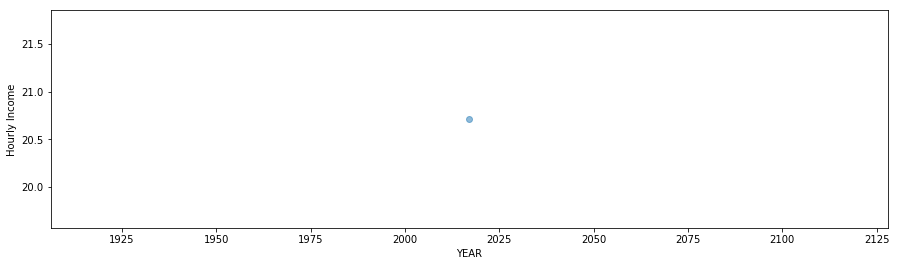

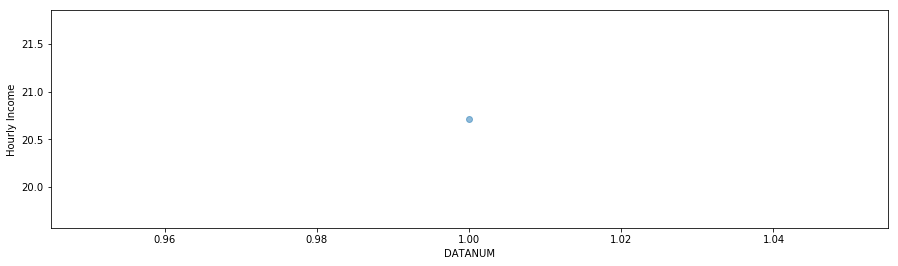

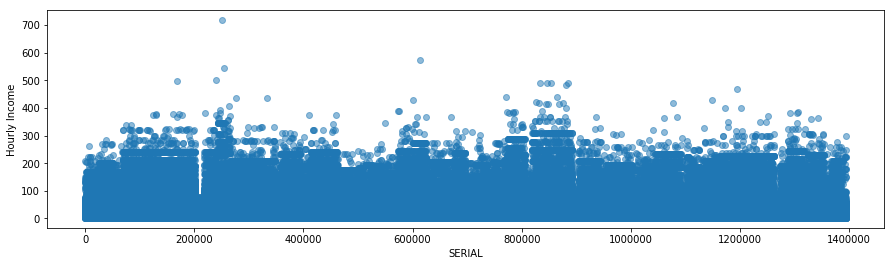

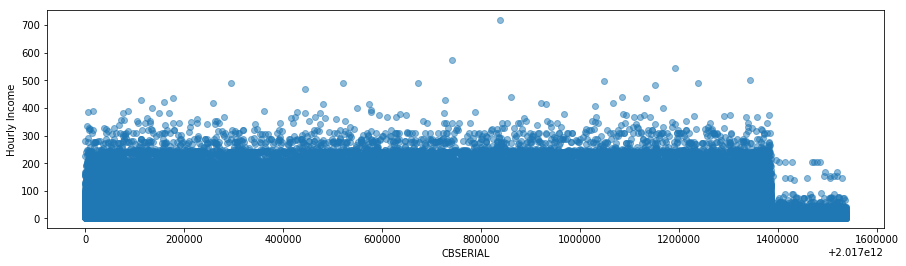

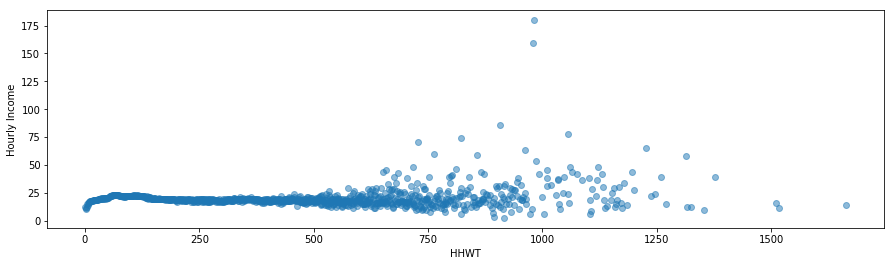

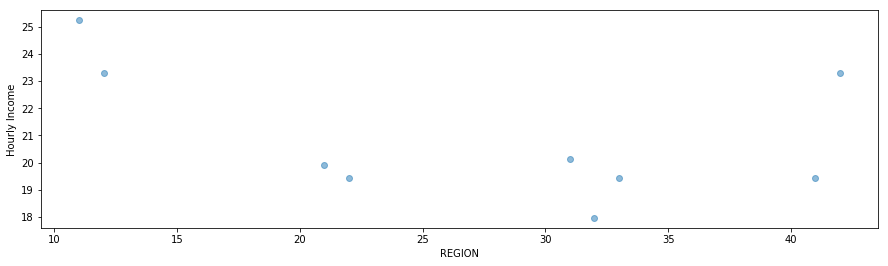

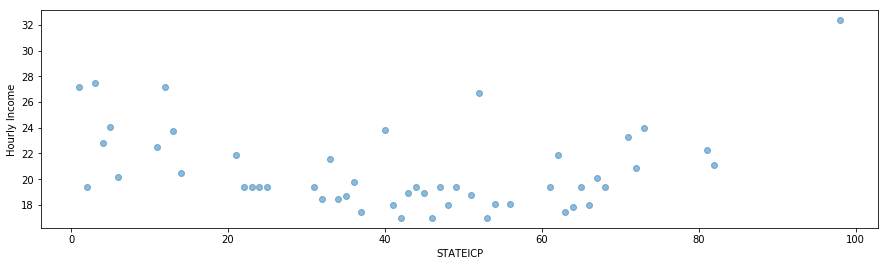

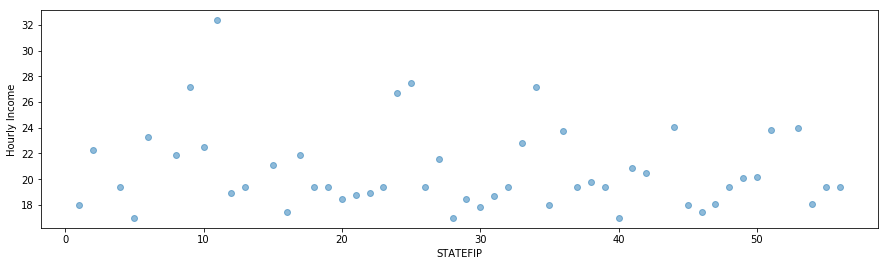

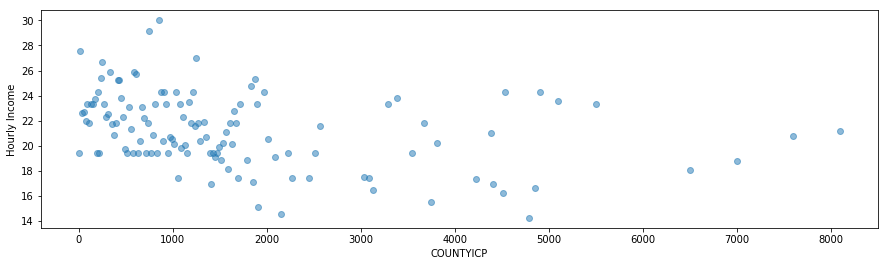

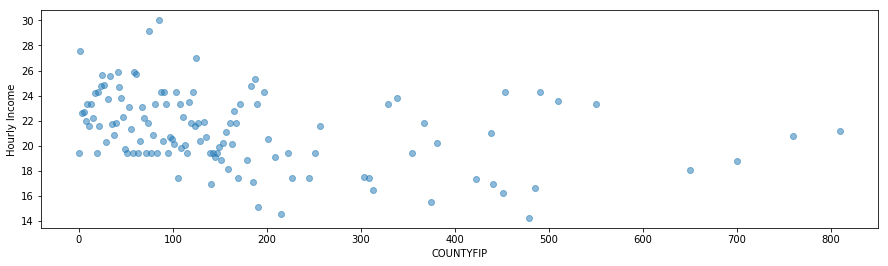

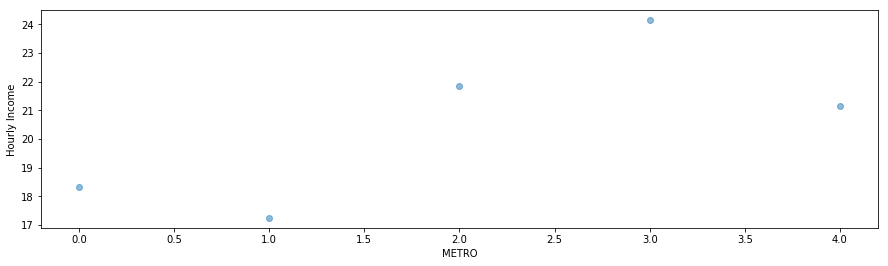

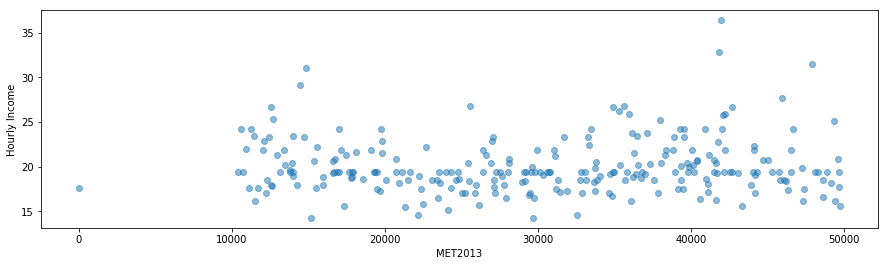

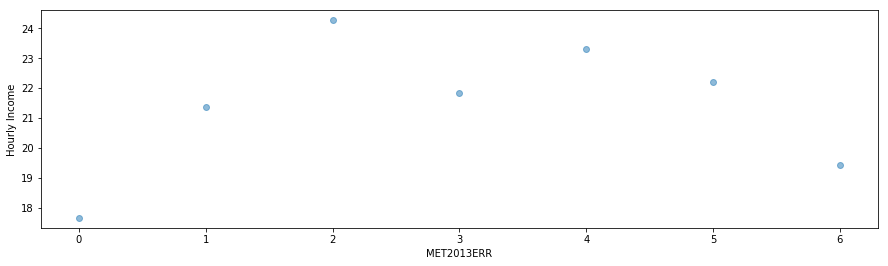

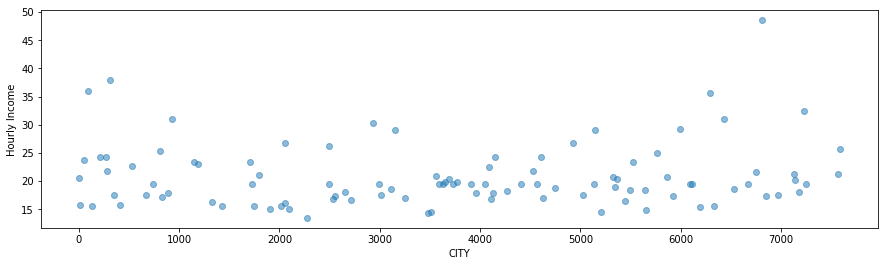

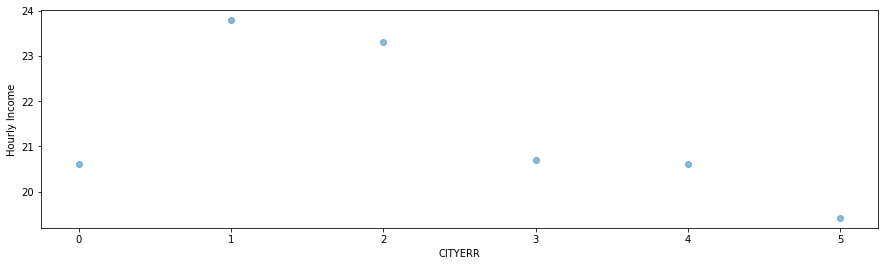

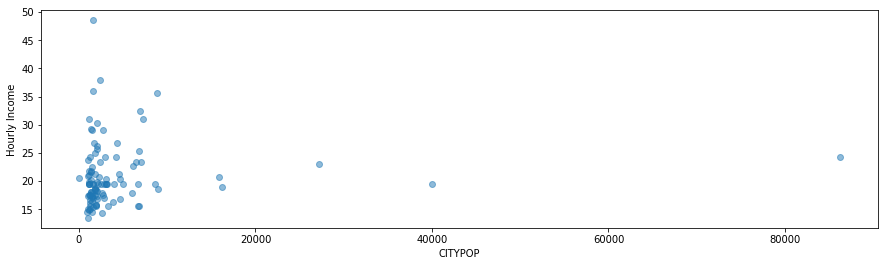

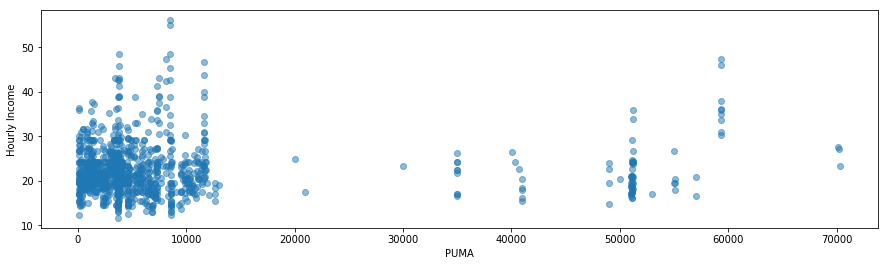

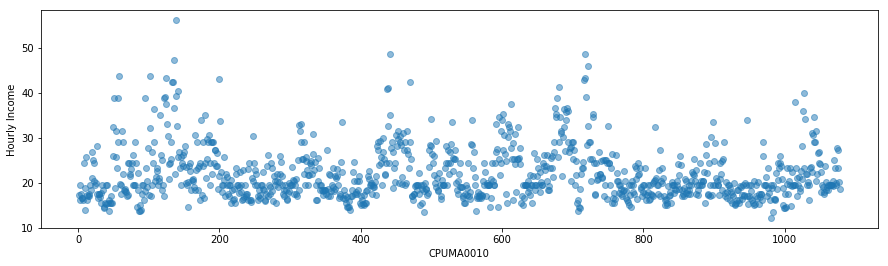

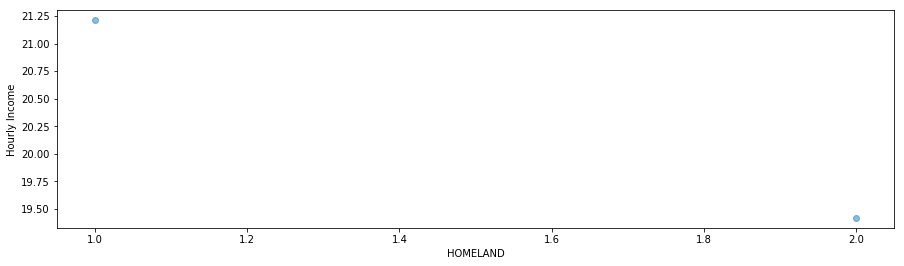

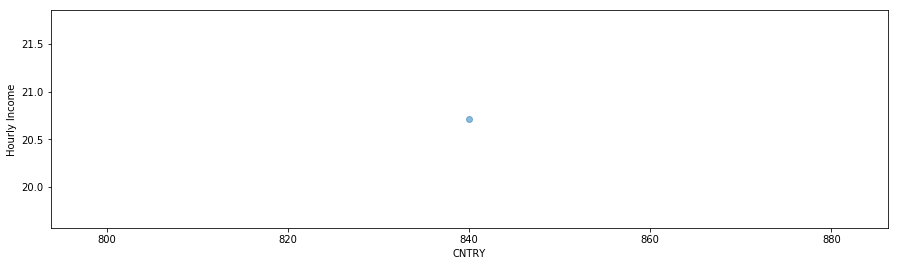

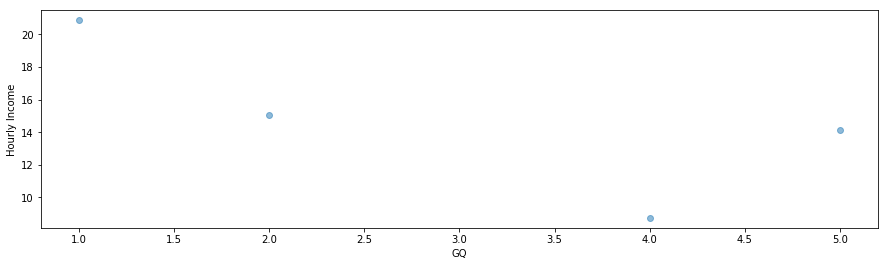

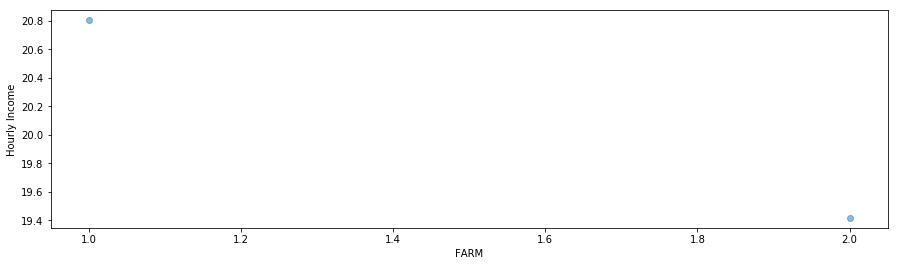

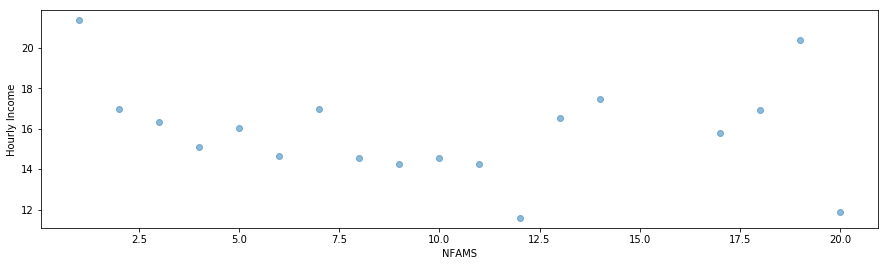

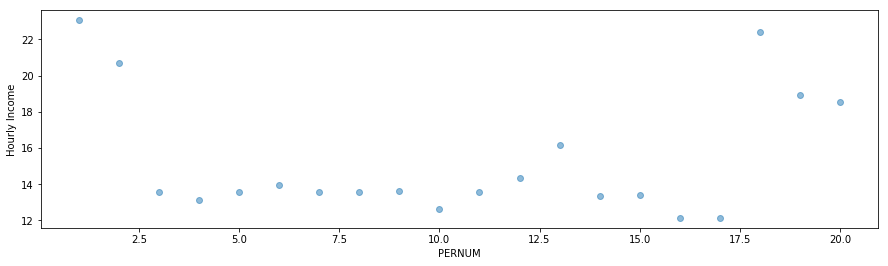

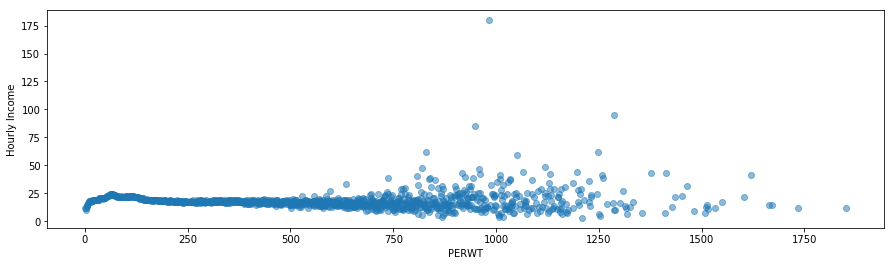

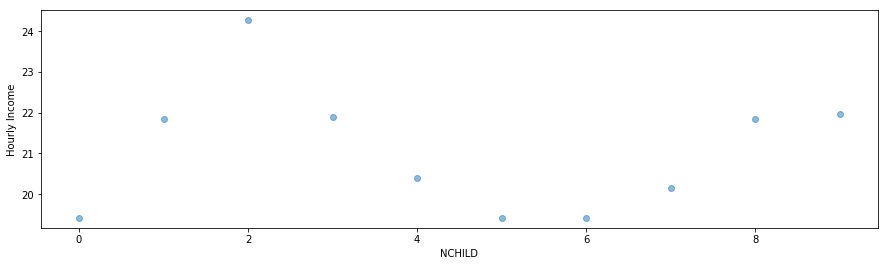

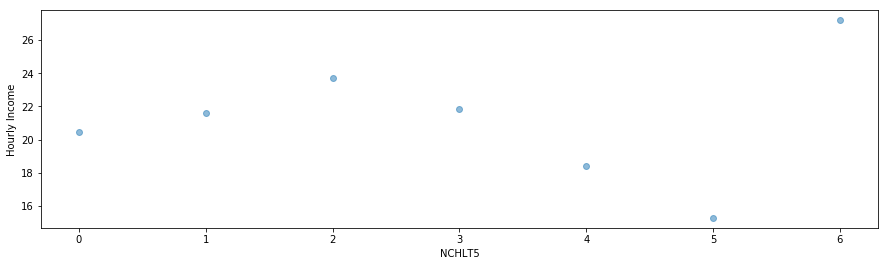

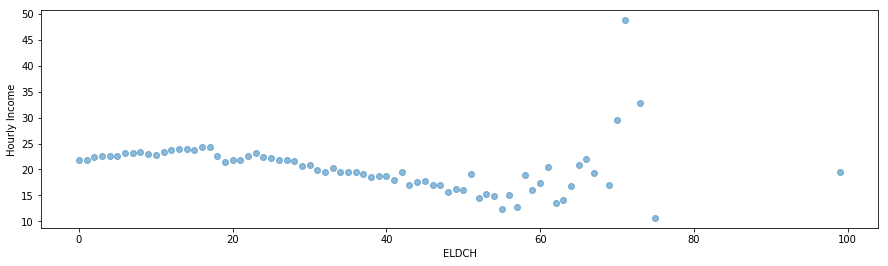

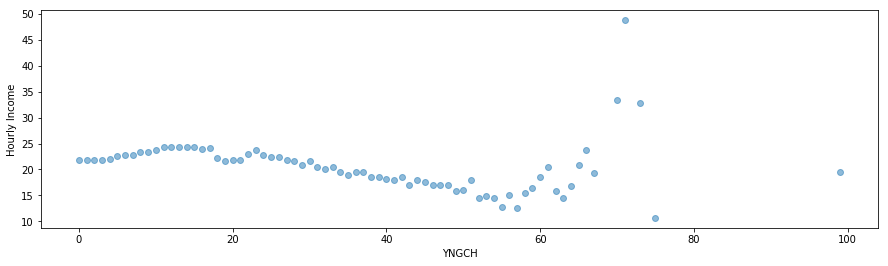

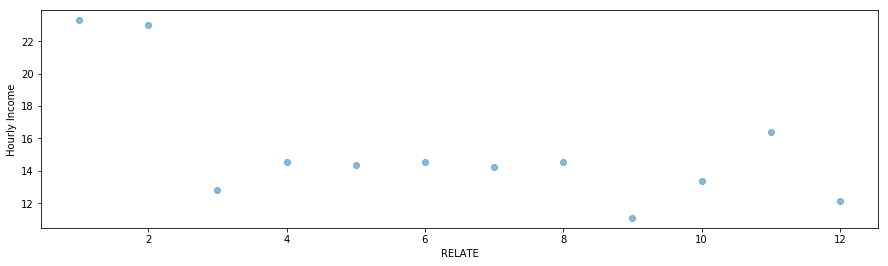

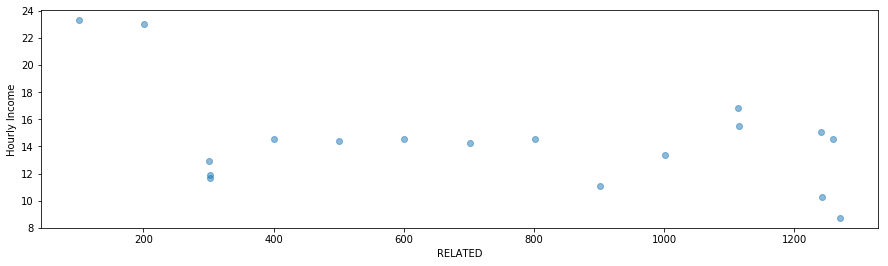

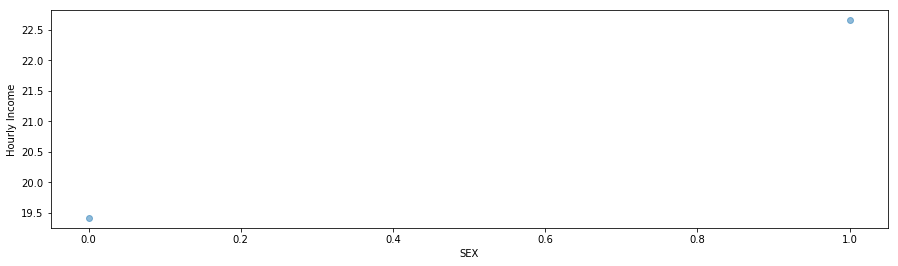

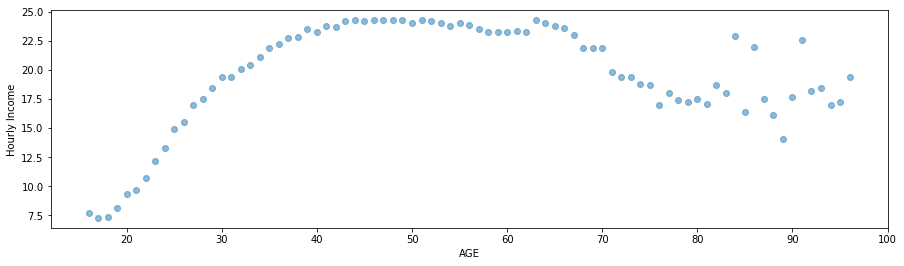

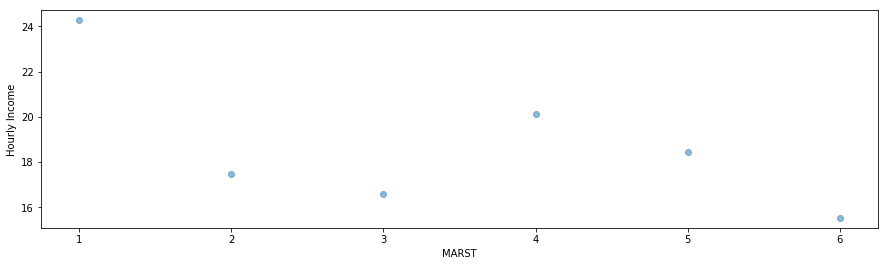

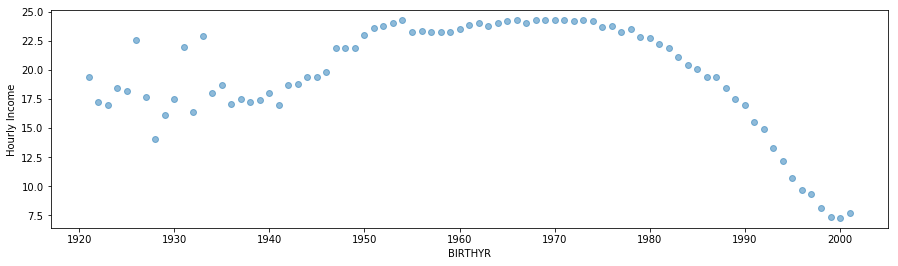

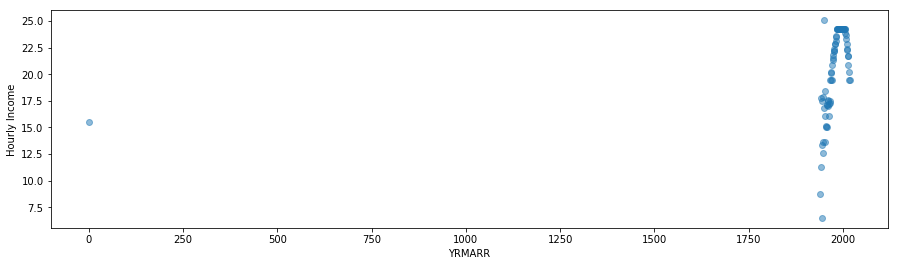

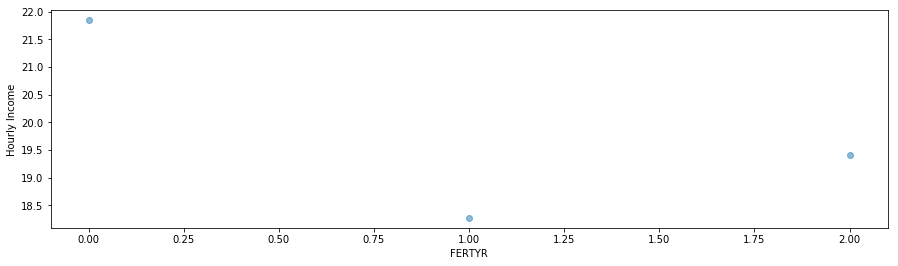

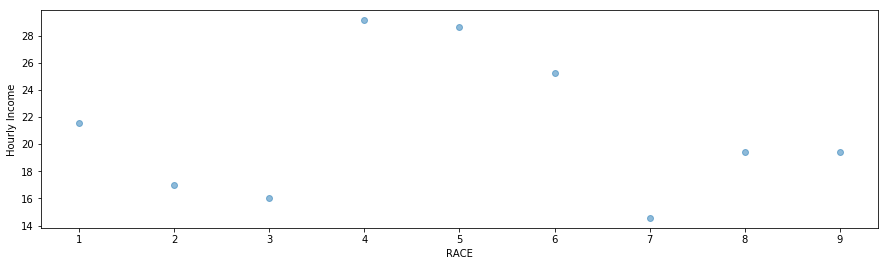

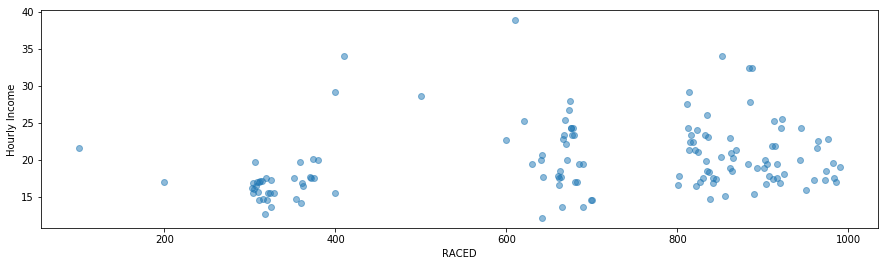

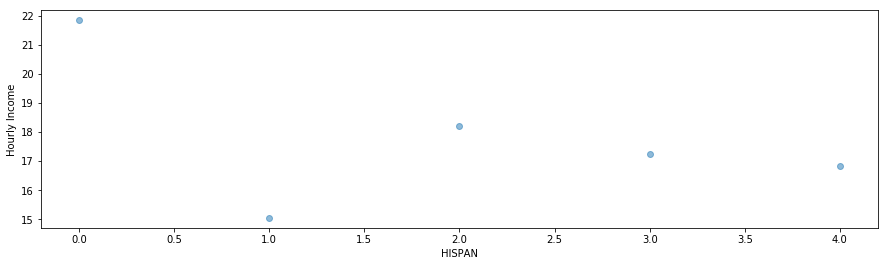

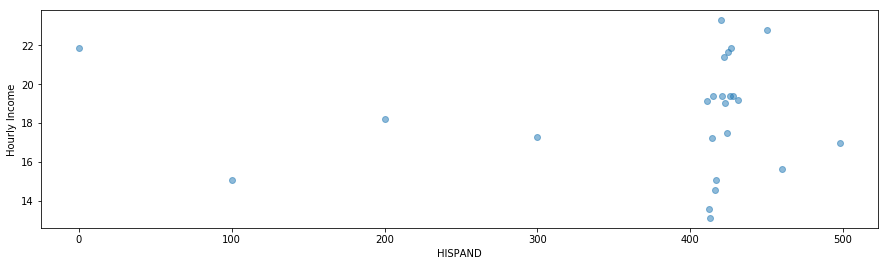

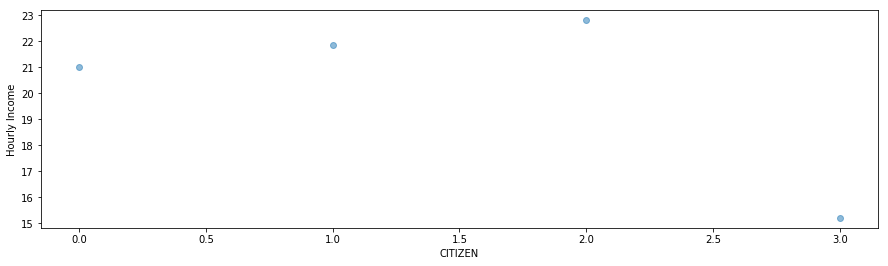

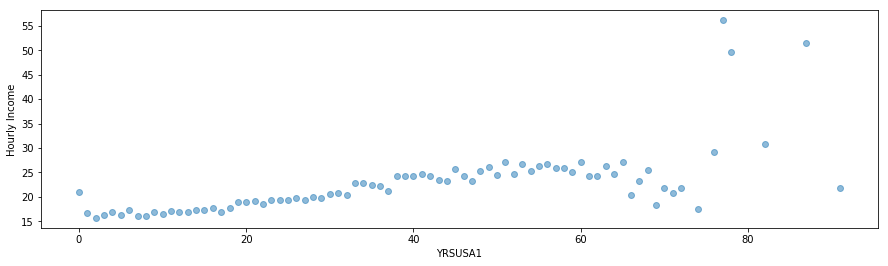

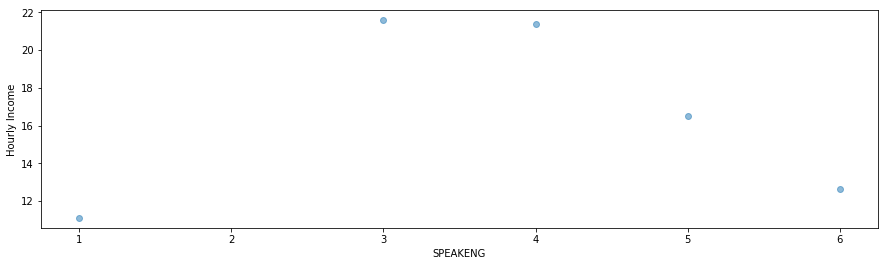

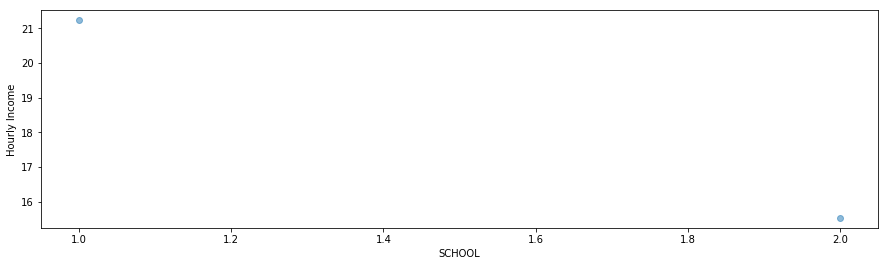

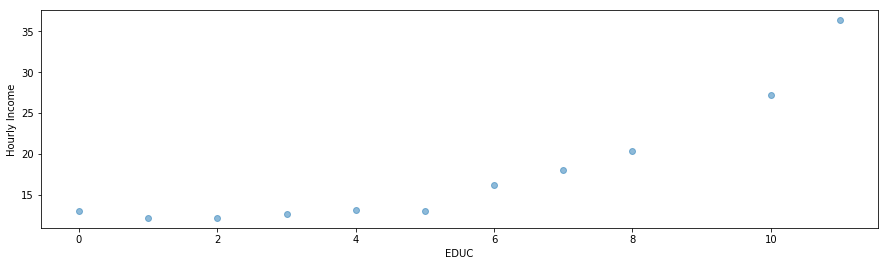

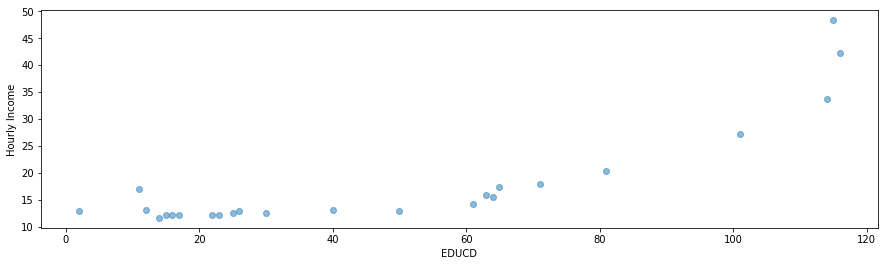

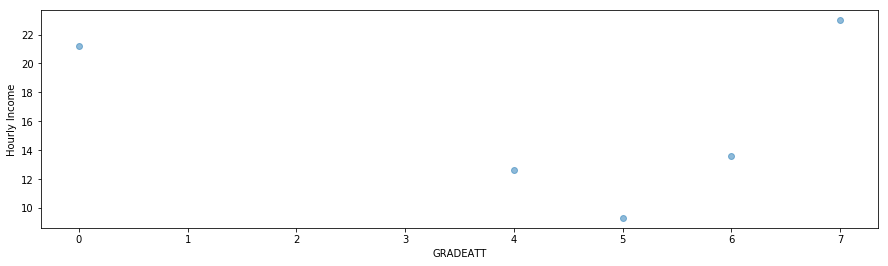

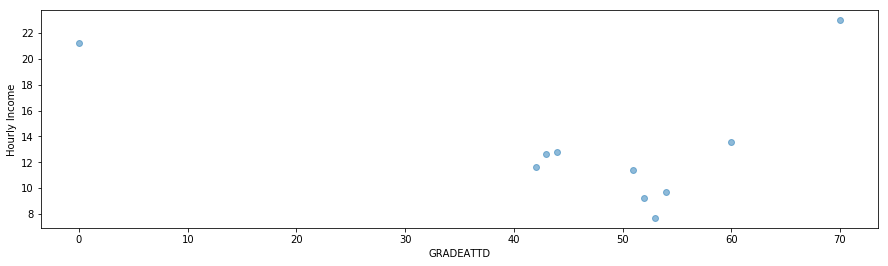

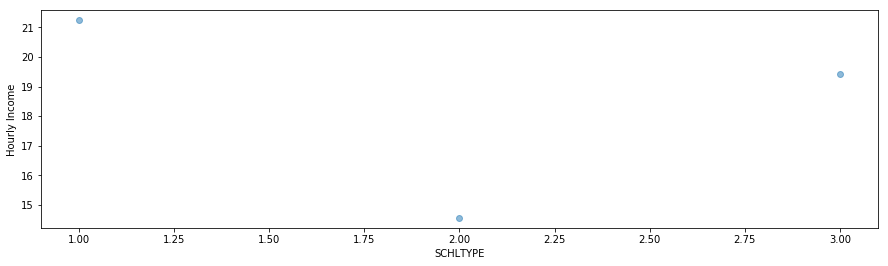

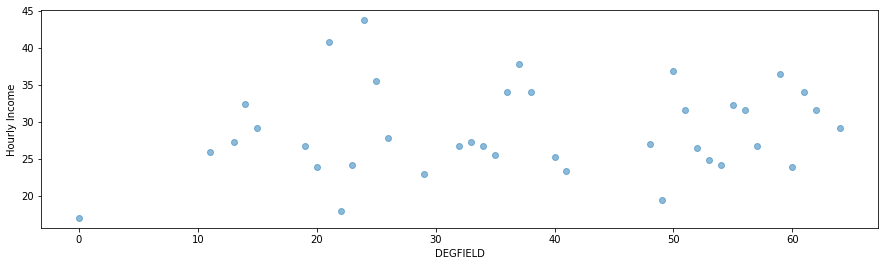

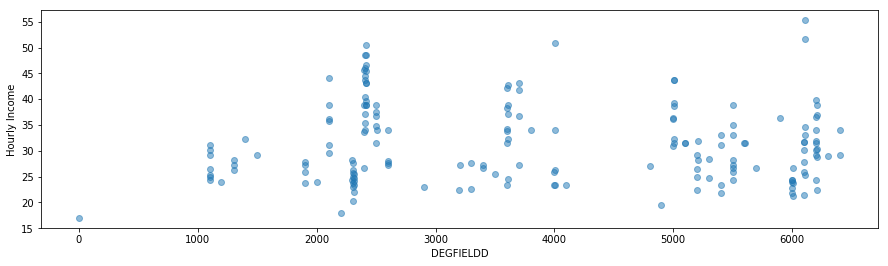

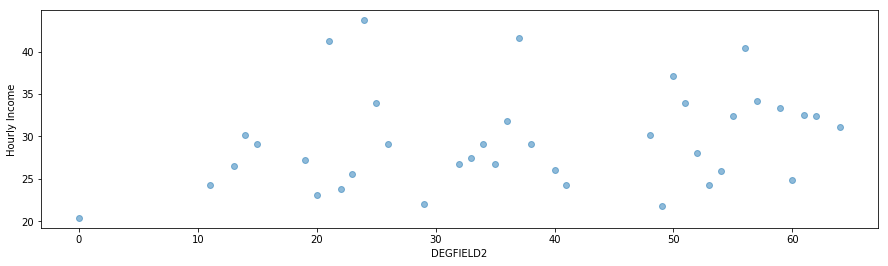

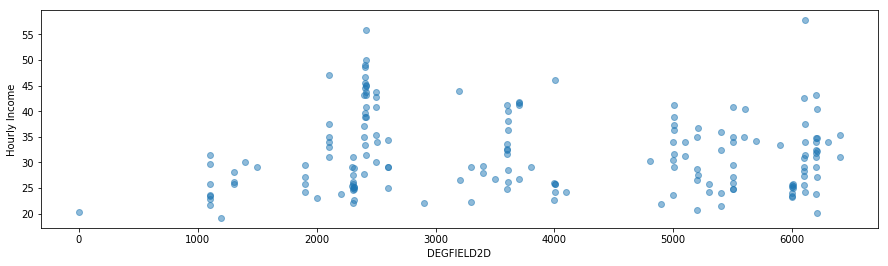

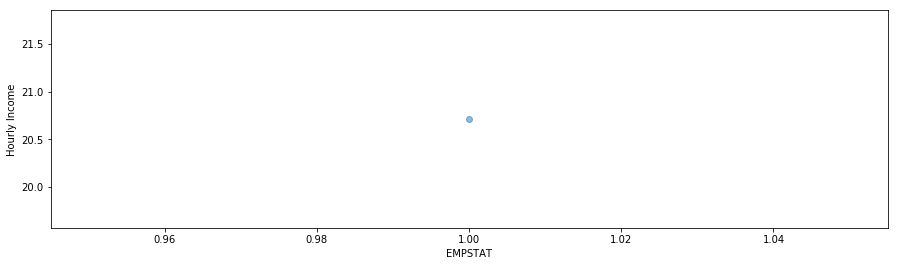

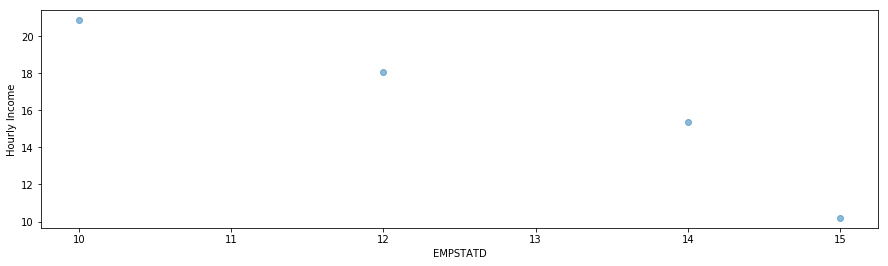

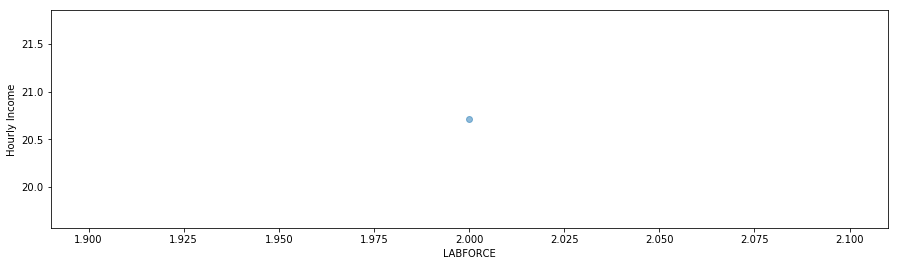

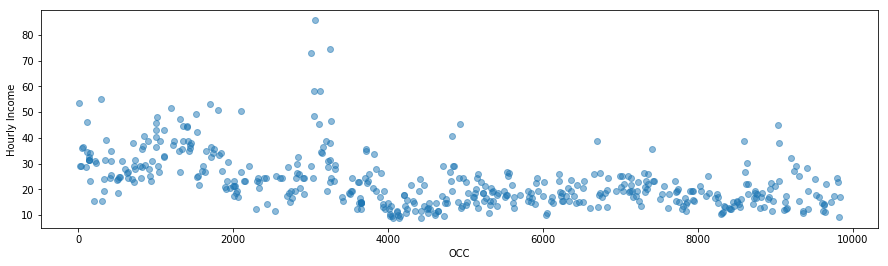

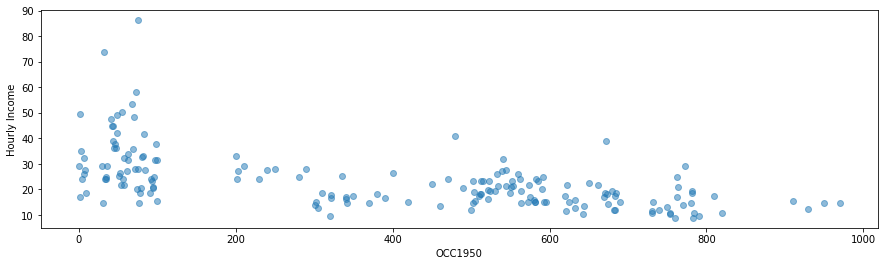

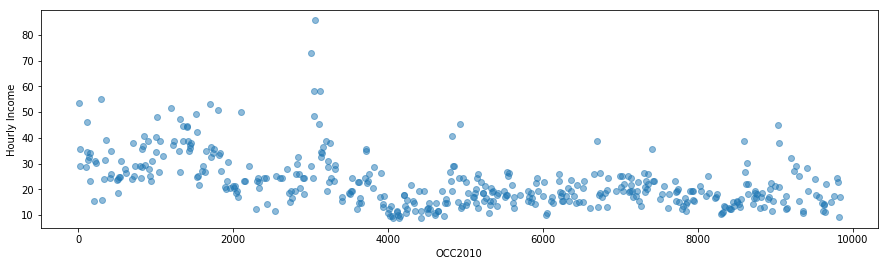

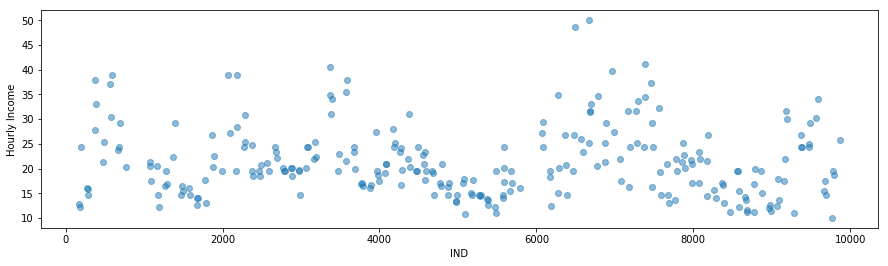

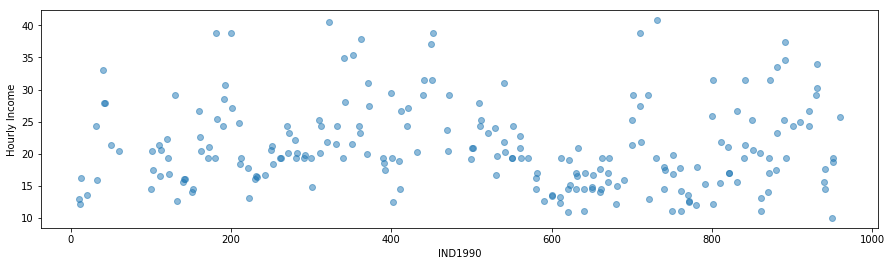

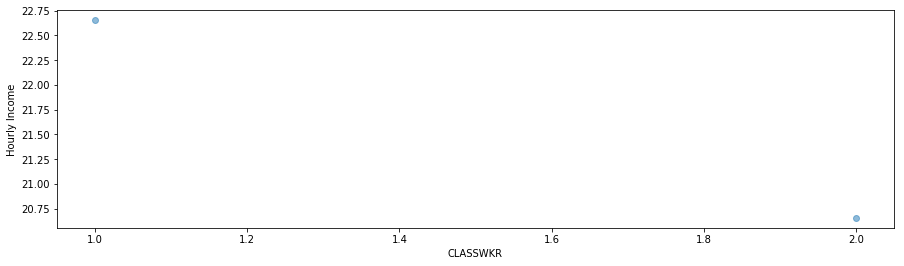

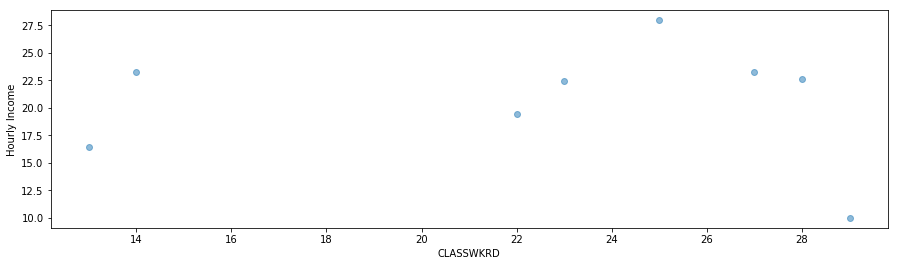

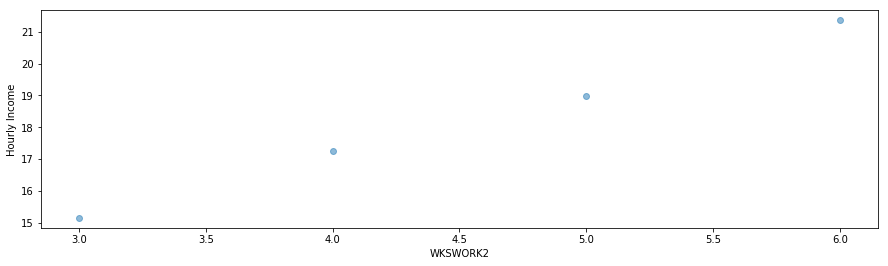

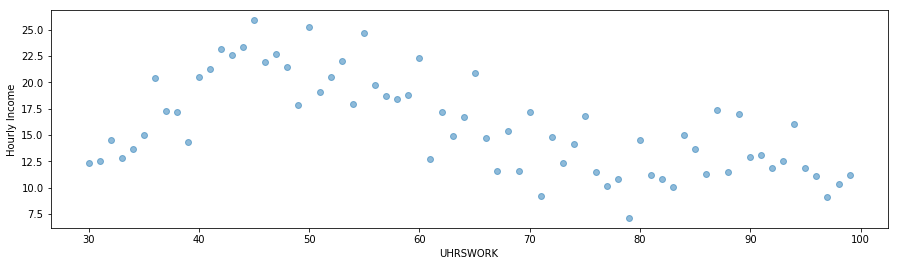

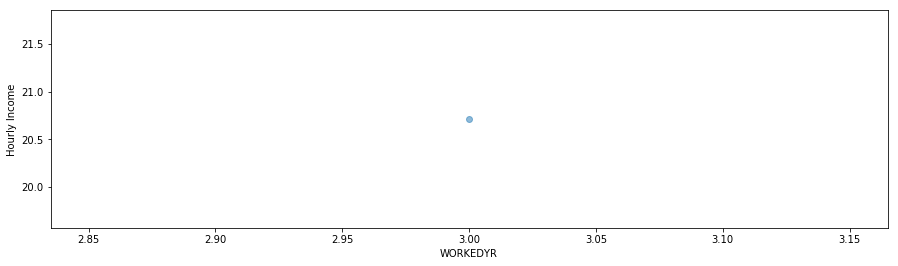

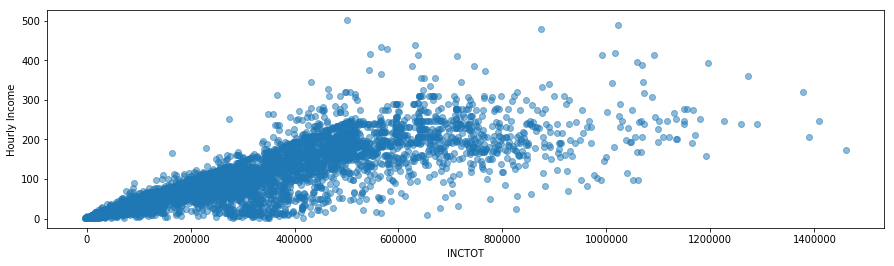

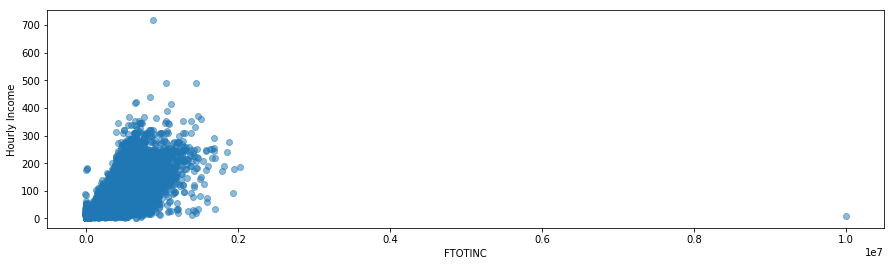

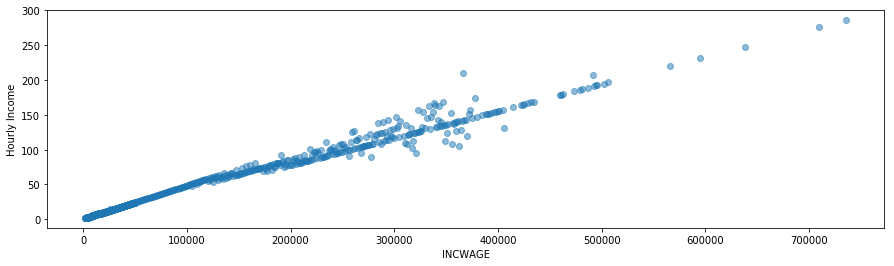

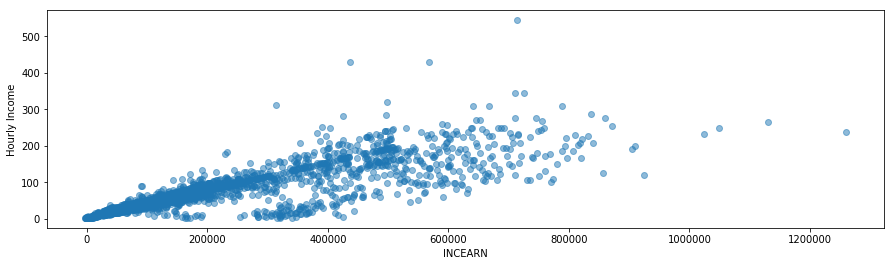

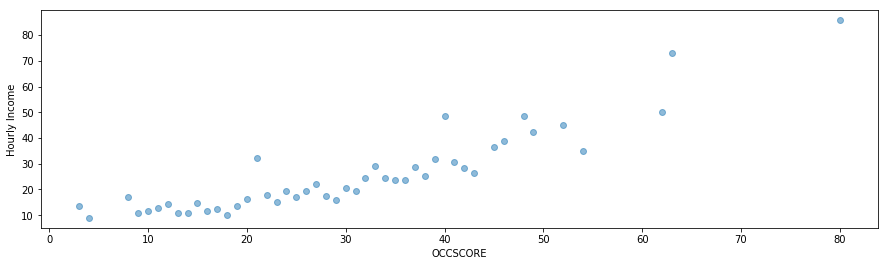

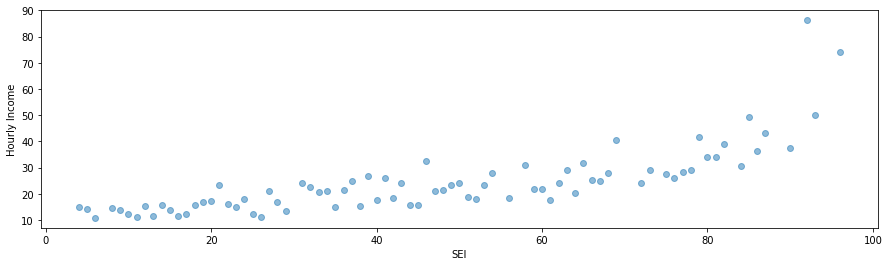

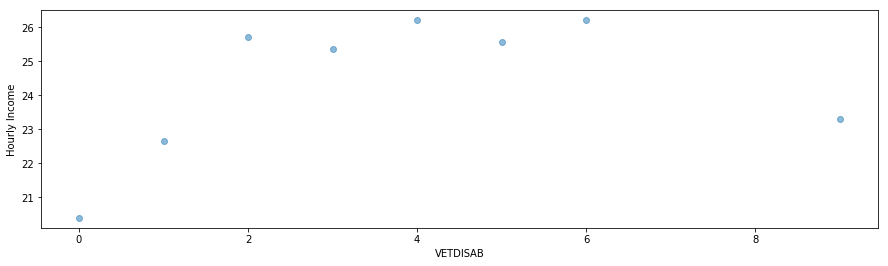

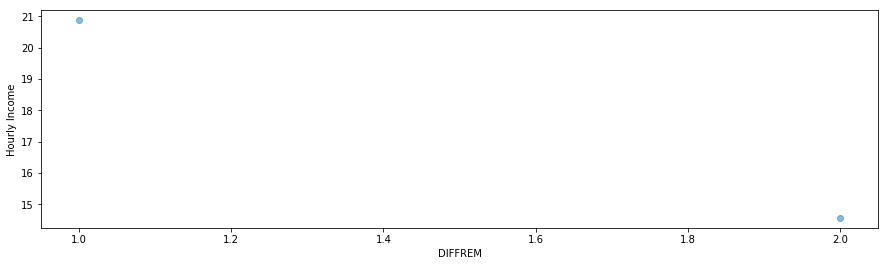

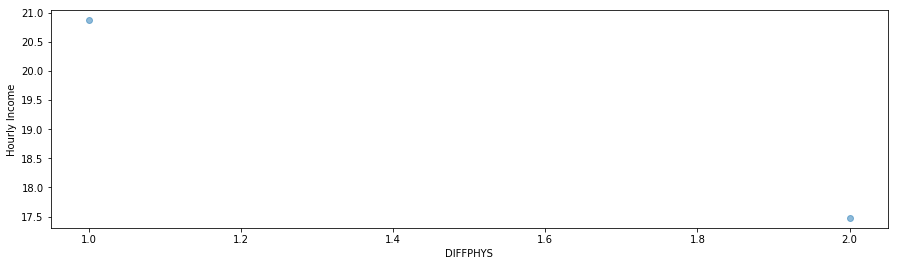

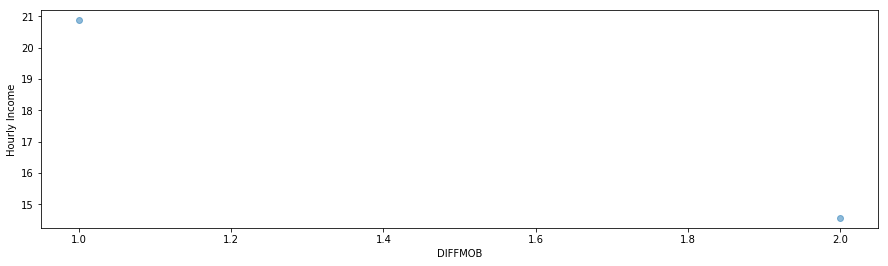

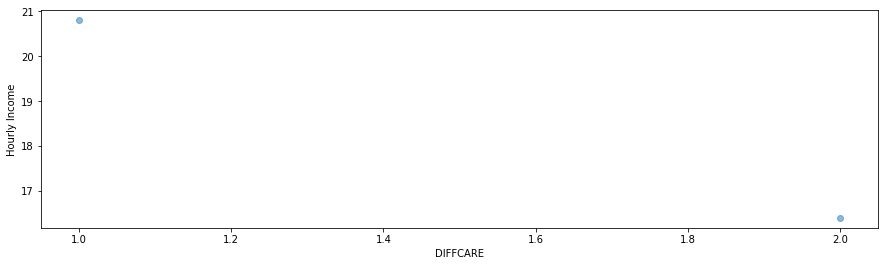

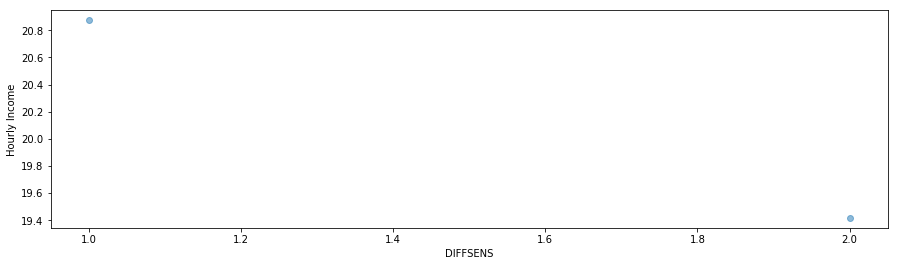

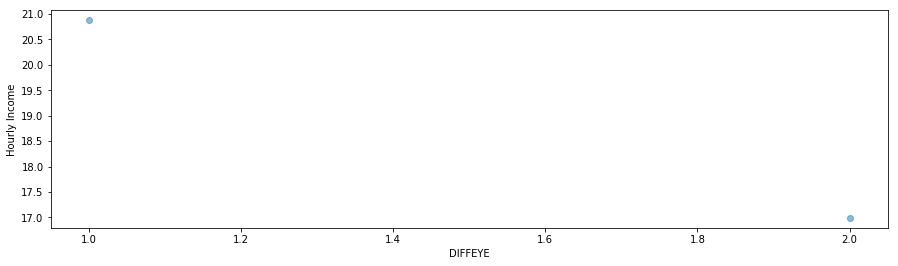

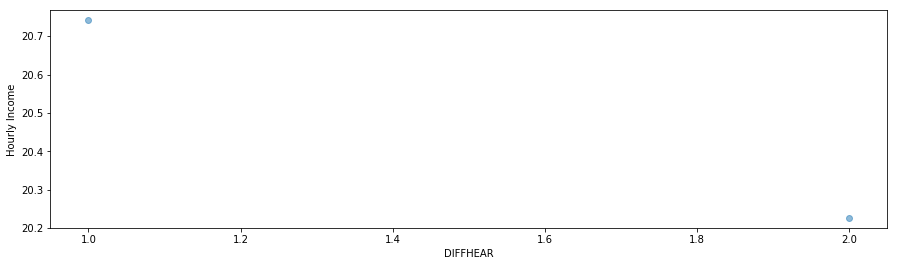

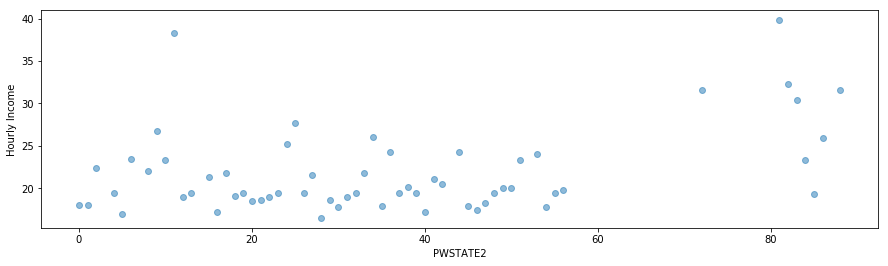

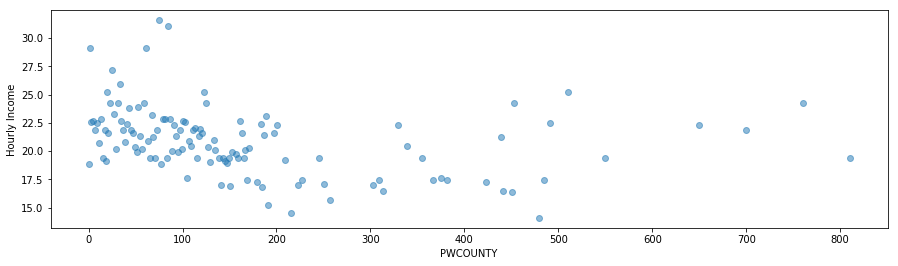

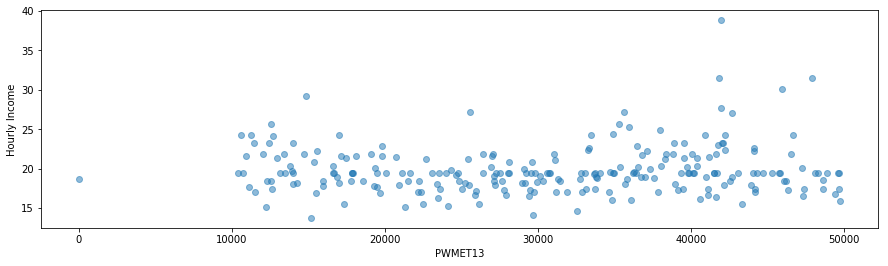

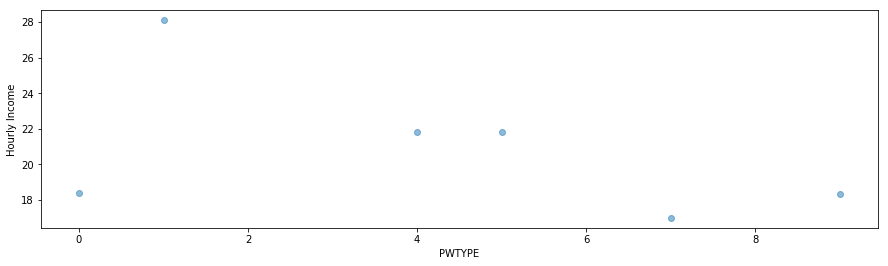

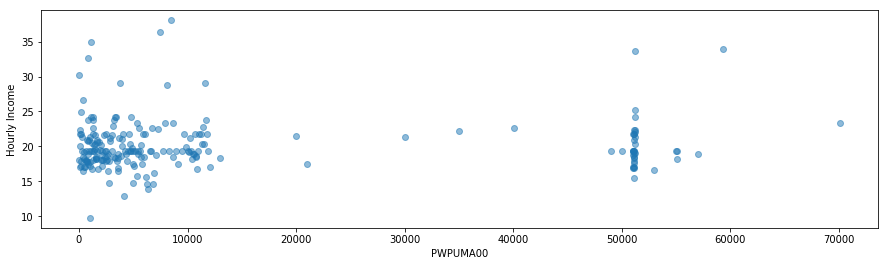

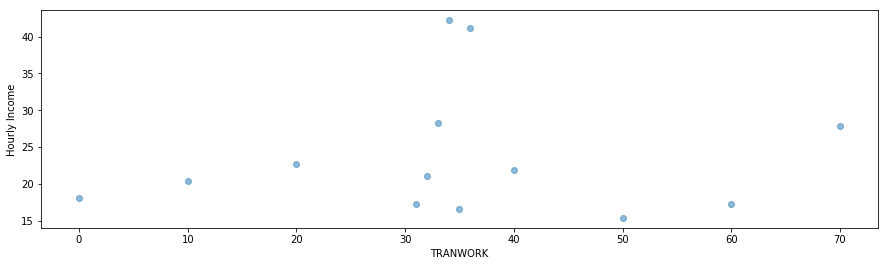

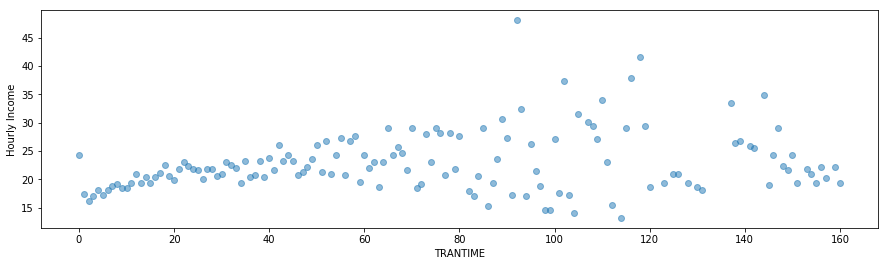

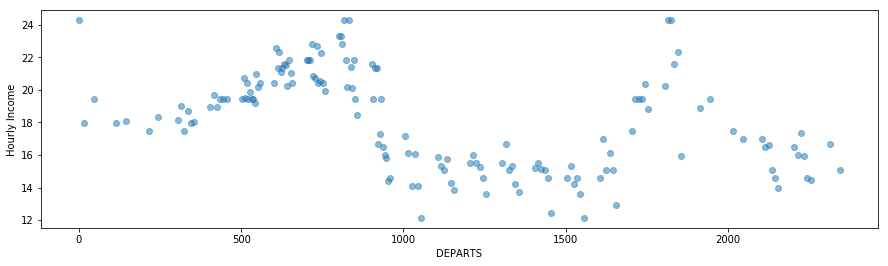

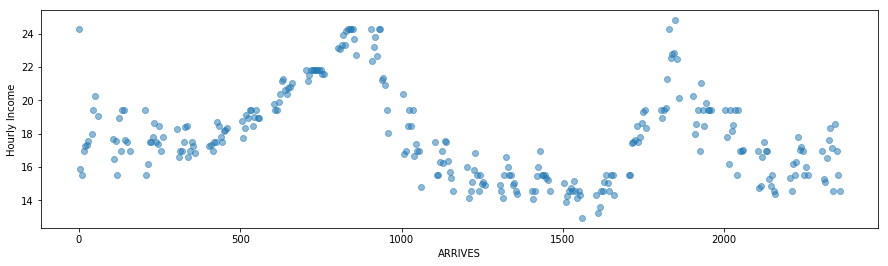

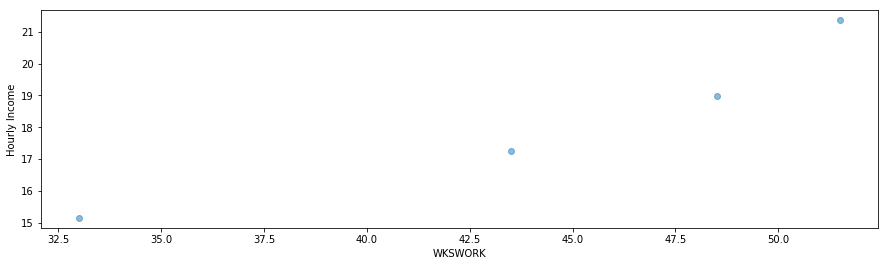

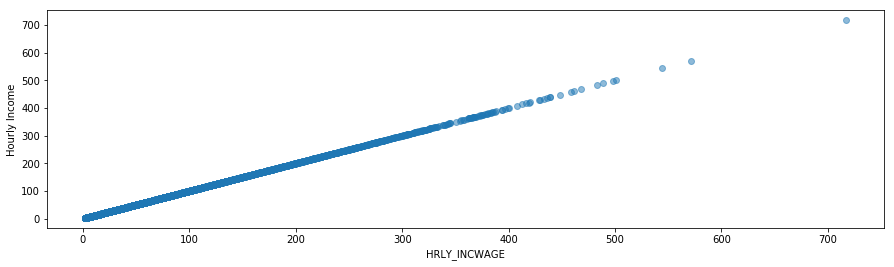

In [27]:
for i, col in enumerate(work_force.columns):
    fig, ax = plt.subplots(figsize=(15,4))
    grouped = work_force.groupby(col)
    mean_income_by_group = grouped['HRLY_INCWAGE'].median()
    plt.plot(mean_income_by_group, 'o', alpha=0.5)
    plt.xlabel(col)
    plt.ylabel('Hourly Income');
    plt.pause(0.05)

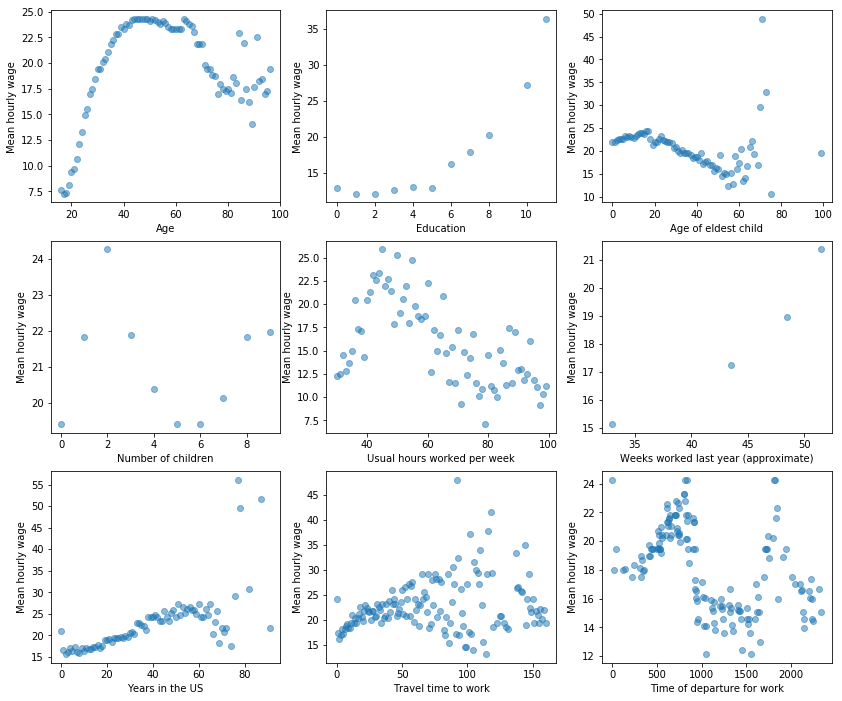

In [207]:
variables = ['AGE', 'EDUC', 'ELDCH','NCHILD', 'UHRSWORK', 'WKSWORK', 'YRSUSA1', 'TRANTIME', 'DEPARTS']
variables_describe = ['Age', 'Education', 'Age of eldest child', 'Number of children', 'Usual hours worked per week', 'Weeks worked last year (approximate)', 'Years in the US', 'Travel time to work', 'Time of departure for work']

fig, axarr = plt.subplots(3, 3, figsize=(14,12))
for i in range(3):
    for j in range(3):
        grouped = work_force.groupby(variables[i * 3 + j])
        mean_income_by_group = grouped['HRLY_INCWAGE'].median()
        axarr[i, j].plot(mean_income_by_group, 'o', alpha=0.5)
        axarr[i, j].set(ylabel='Mean hourly wage', xlabel=variables_describe[i * 3 + j])

In [208]:
work_force_pow4 = work_force.copy()
for var in variables:
    for power in '234':
        work_force_pow4[var+power] = work_force_pow4[var]**int(power)
        
work_force_pow4.head()

,YEAR,DATANUM,SERIAL,CBSERIAL,HHWT,REGION,STATEICP,STATEFIP,COUNTYICP,COUNTYFIP,...,WKSWORK4,YRSUSA12,YRSUSA13,YRSUSA14,TRANTIME2,TRANTIME3,TRANTIME4,DEPARTS2,DEPARTS3,DEPARTS4
1,2017,1,2,2017000000031,45,32,41,1,0,0,...,7.034430e+06,0,0,0,2500,125000,6250000,412164,264609288,169879162896
2,2017,1,3,2017000000061,136,32,41,1,0,0,...,7.034430e+06,0,0,0,2025,91125,4100625,3258025,5880735125,10614726900625
5,2017,1,4,2017000000158,19,32,41,1,0,0,...,7.034430e+06,0,0,0,625,15625,390625,514089,368601813,264287499921
10,2017,1,5,2017000000159,21,32,41,1,0,0,...,7.034430e+06,289,4913,83521,3600,216000,12960000,362404,218167208,131336659216
11,2017,1,5,2017000000159,21,32,41,1,0,0,...,7.034430e+06,0,0,0,7225,614125,52200625,492804,345948408,242855782416


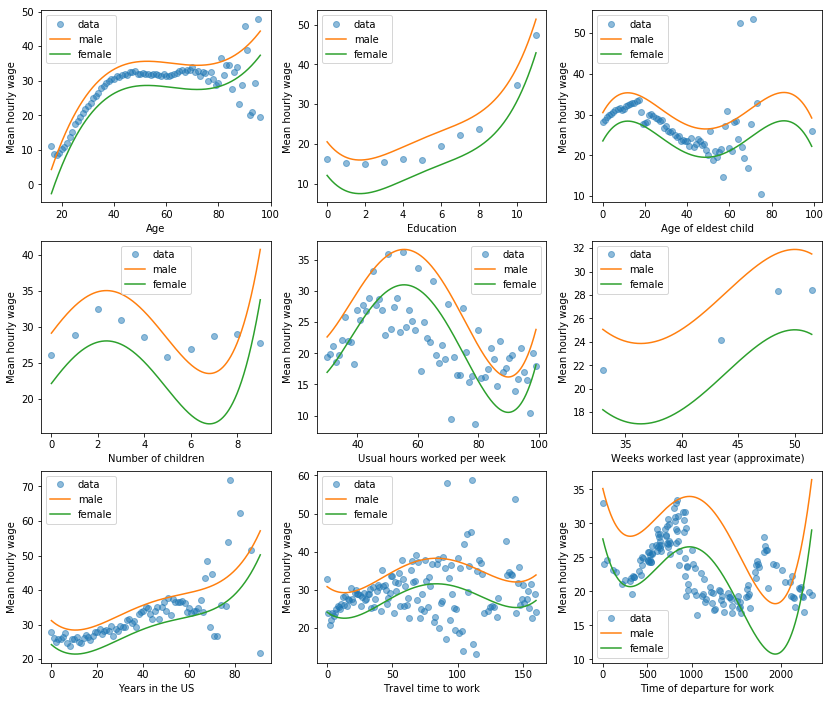

In [209]:
fig, axarr = plt.subplots(3, 3, figsize=(14,12))
for i in range(3):
    for j in range(3):
        col = variables[i * 3 + j]
        # Plot data
        grouped = work_force_pow4.groupby(col)
        mean_income_by_group = grouped['HRLY_INCWAGE'].mean()
        axarr[i, j].plot(mean_income_by_group, 'o', alpha=0.5, label='data')
        axarr[i, j].set(ylabel='Mean hourly wage', xlabel=variables_describe[i * 3 + j])
        
        # Plot predicted male and female
        formula = 'HRLY_INCWAGE ~ C(SEX) + '
        for name in variables:
            formula += col + ' + '
            formula += col + '2 + '
            formula += col + '3 + '
            formula += col + '4 + '
        model = smf.ols(formula[:-3], data=work_force_pow4)
        results = model.fit()
        
        df = pd.DataFrame()
        df[col] = np.linspace(work_force_pow4[col].min(), work_force_pow4[col].max(), len(work_force_pow4[col]))
        df[col+'2'] = df[col]**2
        df[col+'3'] = df[col]**3
        df[col+'4'] = df[col]**4
        
        df['SEX'] = 1
        pred = results.predict(df)
        axarr[i, j].plot(df[col], pred, label='male')
        
        df['SEX'] = 0
        pred = results.predict(df)
        axarr[i, j].plot(df[col], pred, label='female') 
        axarr[i, j].legend();

## People with Disabilities

1 = Does not have a disability

2 = Have a disability

In [192]:
diff_vars = ['DIFFHEAR', 'DIFFPHYS', 'DIFFEYE', 'DIFFCARE', 'DIFFREM', 'DIFFMOB']
diff_vars_describe = ['Hearing difficulty', 'Ambulatory difficulty', 'Vision difficulty', 'Self-care difficulty', 'Cognitive difficulty', 'Independent living difficulty']
is_disabled = (work_force["DIFFHEAR"] == 2) | (work_force["DIFFEYE"] == 2) | (work_force["DIFFPHYS"] == 2) | (work_force["DIFFCARE"] == 2) | (work_force["DIFFMOB"] == 2) | (work_force["DIFFREM"] == 2)

First, we create a DataFrame for those respondents who do not have any disability. We also include the `HRLY_INCWAGE` column in this DataFrame.

In [187]:
non_disabled = work_force[["HRLY_INCWAGE"] + diff_vars].copy()
non_disabled = non_disabled[~is_disabled]

non_disabled.head()

,HRLY_INCWAGE,DIFFHEAR,DIFFPHYS,DIFFEYE,DIFFCARE,DIFFREM,DIFFMOB
1,17.799353,1,1,1,1,1,1
2,33.287101,1,1,1,1,1,1
5,11.650485,1,1,1,1,1,1
10,21.035599,1,1,1,1,1,1
11,27.669903,1,1,1,1,1,1


Next, we create a DataFrame to store the `HRLY_INCWAGE` of non-disabled people.

In [189]:
diff_df = work_force[["CBSERIAL"]].copy() # CBSERIAL is a dummy variable to keep the index column
diff_df["No difficulties"] = non_disabled["HRLY_INCWAGE"]
diff_df.head()

,CBSERIAL,No difficulties
1,2017000000031,17.799353
2,2017000000061,33.287101
5,2017000000158,11.650485
10,2017000000159,21.035599
11,2017000000159,27.669903


Similarly, we also create a DataFrame for each group of disabled people and add them to `diff_df`.

In [190]:
for i, col in enumerate(diff_vars):
    disabled = work_force.copy()
    disabled = disabled[disabled[col] == 2]
    # Add a column to diff_df
    diff_df[diff_vars_describe[i]] = disabled["HRLY_INCWAGE"]
    
# Drop the dummy variable
diff_df = diff_df.drop(["CBSERIAL"], axis=1)
diff_df.describe()

,No difficulties,Hearing difficulty,Ambulatory difficulty,Vision difficulty,Self-care difficulty,Cognitive difficulty,Independent living difficulty
count,1.096557e+06,21083.000000,20983.000000,13942.000000,4169.000000,14999.000000,8292.000000
mean,2.829058e+01,26.576556,22.716021,22.803967,22.536601,19.056181,19.989366
std,2.785562e+01,25.428707,22.604345,23.032487,27.578427,19.539960,23.675311
min,2.003390e+00,2.020202,2.019417,2.020202,2.019417,2.012357,2.012357
25%,1.359223e+01,13.106796,11.650485,11.165049,10.614887,9.708738,9.514563
50%,2.097087e+01,20.226537,17.475728,16.990291,16.396980,14.563107,14.563107
75%,3.378641e+01,31.553398,26.699029,27.184466,25.757576,22.863307,23.300971
max,7.171717e+02,488.888889,488.888889,368.582375,488.888889,436.363636,488.888889


Finally, we plot the result using Box Plot.

[Text(0.5, 0, 'Hourly income')]

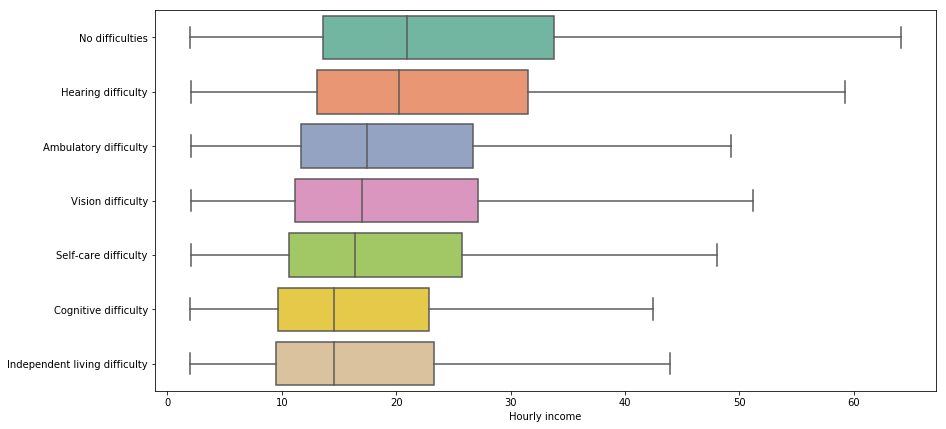

In [191]:
fig, ax = plt.subplots(figsize=(14,7))
ax = sns.boxplot(data=diff_df, orient="h", palette="Set2", showfliers=False)
ax.set(xlabel="Hourly income")

### Comparing incomes between men and women in non-disabled and disabled groups

We create a similar `non_disabled` DataFrame as above. This time, we also include the `SEX` column.

In [193]:
work_force["DIFFTOTAL"] = is_disabled
non_disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
non_disabled = non_disabled[~is_disabled]
    
non_disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
1,17.799353,0,False
2,33.287101,1,False
5,11.650485,0,False
10,21.035599,1,False
11,27.669903,0,False


Next, we select people with at least one disability and keep two columns, `HRLY_INCWAGE` and `SEX`.

In [196]:
disabled = work_force[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
disabled = disabled[is_disabled]
disabled.head()

,HRLY_INCWAGE,SEX,DIFFTOTAL
45,2.718447,1,True
109,7.216495,0,True
167,14.147018,0,True
168,11.067961,1,True
303,4.854369,1,True


First, let's look at the distribution of hourly income of the `non_disabled` group.

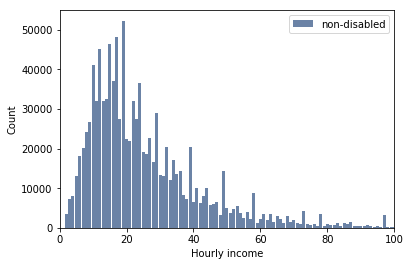

In [206]:
hist_non_disabled = thinkstats2.Hist(np.round(non_disabled["HRLY_INCWAGE"]), label='non-disabled')
thinkplot.hist(hist_non_disabled)
thinkplot.Config(xlim=(0, 100), xlabel="Hourly income", ylabel="Count")

The distribution is highly skews, so we will use median income to compute the pay gap in each group, which we will use to analyze the effect of disability on pay gap.

For `non_disabled` group, we can compute the difference between median hourly income of men and of women as follows:

In [198]:
male_median_non_disabled = non_disabled[non_disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_non_disabled = non_disabled[non_disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_non_disabled = male_median_non_disabled - female_median_non_disabled
print("Male median hourly income\t", male_median_non_disabled)
print("Female median hourly income\t", female_median_non_disabled)
print("Pay gap (Non-disabled)\t\t", pay_gap_non_disabled)

Male median hourly income	 22.94792586054722
Female median hourly income	 19.41747572815534
Pay gap (Non-disabled)		 3.5304501323918807


For `disabled` group:

In [199]:
male_median_disabled = disabled[disabled.SEX == 1]["HRLY_INCWAGE"].median()
female_median_disabled = disabled[disabled.SEX == 0]["HRLY_INCWAGE"].median()
pay_gap_disabled = male_median_disabled - female_median_disabled
print("Male median hourly income\t", male_median_disabled)
print("Female median hourly income\t", female_median_disabled)
print("Pay gap (Disabled)\t\t", pay_gap_disabled)

Male median hourly income	 19.41747572815534
Female median hourly income	 15.782828282828282
Pay gap (Disabled)		 3.6346474453270563


Analysissss

In [200]:
(pay_gap_non_disabled - pay_gap_disabled)/pay_gap_non_disabled

-0.029513888888888496

Compute CI.....

In [201]:
def computePayGap(df):
        male_median = df[df.SEX == 1]["HRLY_INCWAGE"].median()
        female_median = df[df.SEX == 0]["HRLY_INCWAGE"].median()
        return male_median - female_median
    
def computeStatistic(df):
    df = df[["HRLY_INCWAGE", "SEX", "DIFFTOTAL"]]
    is_disabled = df["DIFFTOTAL"]
    
    non_disabled = df[~is_disabled]
    disabled = df[is_disabled]

    pay_gap_non_disabled = computePayGap(non_disabled)
    pay_gap_disabled = computePayGap(disabled)

    return (pay_gap_non_disabled - pay_gap_disabled)/pay_gap_non_disabled
    
def computeCI(work_force, iter=201):
    stats = []
    
    for i in range(iter):
        df = thinkstats2.ResampleRows(work_force)
        stat = computeStatistic(df)
        stats.append(stat)
    
    cdf = thinkstats2.Cdf(stats)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    return ci

In [202]:
computeCI(work_force)

(-0.0999999999999993, 0.037500000000000366)

Compute P value

In [203]:
class ProportionalTest():
    def __init__(self, data):
        self.data = data
        self.actual = self.TestStatistic(data)
        
    def PValue(self, iters=101):
        self.test_stats = [self.TestStatistic(self.RunModel()) for _ in range(iters)]
        count = sum(1 for x in self.test_stats if x >= self.actual)
        return 100 * count / iters
        
    def TestStatistic(self, data):
        return computeStatistic(data)

    def RunModel(self):
        # Copy the data frame
        shuffled_data = self.data.copy()
        # Permutate the rows of the DIFFTOTAL column on the copy
        shuffled_data["DIFFTOTAL"] = np.random.permutation(shuffled_data["DIFFTOTAL"]) 
        
        return shuffled_data

In [204]:
ProportionalTest(work_force).PValue()

51.48514851485149